# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [39]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables relative to whether someone got admitted or not. Think in terms of for a certain prestige level, how many people got admitted and didnt get admitted

In [40]:
# frequency table for prestige and whether or not someone was admitted
df_raw.groupby(['prestige', 'admit']).count()

gre  gpa
prestige admit          
1.0      0       28   28
         1       33   33
2.0      0       95   96
         1       53   53
3.0      0       93   93
         1       28   28
4.0      0       55   55
         1       12   12

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [41]:
dummies = pd.get_dummies(df_raw['prestige'], prefix='prestige')

In [42]:
cols_to_keep = ['admit', 'gre', 'gpa']
df_dum = df_raw[cols_to_keep].join(dummies)

#### 2.2 When modeling our class variables, how many do we need? 



Answer: When creating dummy variables from a set of categories, the number of dummy variables created should be one less then the original number of categories. 

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [43]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummies.ix[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


C:\Users\danke_000\Anaconda3\envs\py2\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


In [44]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
df_odds = pd.crosstab(df_raw['prestige'], df_raw['admit'], margins=True)
df_odds

admit,0,1,All
prestige,,,
1.0,28,33,61
2.0,97,53,150
3.0,93,28,121
4.0,55,12,67
All,273,126,399


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [45]:
#First calculate the odds of being admitte to a grad scool if a student went to a #1 school.
#33 were admitted, 28 wre not, 61 applied. The probability admissionadmitted: 33 / 61 = 0.541
# odds of admission: 0.541 / 1- 0.541 = 0.541 / 0.454 = 1.192

#Rank 1 admissions
l1_admit = float(df_odds.loc[1.0][1])
#Rank 1 total applicants
l1_total = float(df_odds.loc[1.0][1] + df_odds.loc[1.0][0])
#probability of Rank#1 admission
l1_p_admit = l1_admit / l1_total
#odds of being admitted (odds of p_admit)
l1_odds = l1_p_admit / (1 - l1_p_admit)
l1_odds

1.1785714285714288

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [46]:
#Rank 2-4 addmissions
all_admit = float(df_odds.loc[2.0][1] + df_odds.loc[3.0][1] + df_odds.loc[4.0][1])
#Rank 2-4 total applicants
all_total = all_admit + float(df_odds.loc[2.0][0] + df_odds.loc[3.0][0] + df_odds.loc[4.0][0])
#Probability of Rank 2-4 admissions
all_p_admit = all_admit / all_total
#Odds of Rank 2-4 admission
all_odds = all_p_admit / (1 - all_p_admit)
all_odds

0.3795918367346939

#### 3.3 Calculate the odds ratio

In [47]:
#Odds ratio for rank 1 admittsion: rank 2-4 admissions
odds_ratio = l1_odds/all_odds
odds_ratio

3.10483870967742

#### 3.4 Write this finding in a sentence: 

Answer: The odds of being admitted to graduate school are 210% greater for students who attended a prestige level 1 undergraduate school than for students who attended a prestige level 2, level 3, or level 4 undergraduate institution. 

#### 3.5 Print the cross tab for prestige_4

In [48]:
df_rank4 = pd.crosstab(df_dum['prestige_4.0'], df_dum['admit'])
df_rank4

admit,0,1
prestige_4.0,,
0,218,115
1,55,12


#### 3.6 Calculate the OR 

In [49]:
#Rank 4 admissions
l4_admit = float(df_rank4.loc[1][1])
#Total Rank 4 applicants
l4_total = l4_admit + float(df_rank4.loc[1][0])
#Probability of being admitted from a rank 4 school
l4_p_admit = l4_admit / l4_total
#Odds of being admitted from a rank 4 school
l4_odds = l4_p_admit/ (1 - l4_p_admit)
#rank 1-3 admissions
other_admit = float(df_rank4.loc[0][1])
#rank 1-3 total applicants
other_total = float(df_rank4.loc[0][1] + df_rank4.loc[0][0])
#probability of admissions from rank 1-3 schools
other_p_admit = other_admit / other_total
#Odds of admission for rank 1-3 schools
other_odds = other_p_admit / (1 - other_p_admit)
#Odds ratio for odds off rank 4 admissions : rank 1-3 admissions
odds_ratio_2 = l4_odds / other_odds
odds_ratio_2

0.41359683794466406

#### 3.7 Write this finding in a sentence

Answer: A student from a rank 4 undergrad is 59% less likely to be accepted to graduate school than students from rank 1, 2, and 3 schools. 

## Part 4. Analysis

In [50]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummies.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [51]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [52]:
train_cols = ['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']

#### 4.2 Fit the model

In [53]:
lm = sm.Logit(data['admit'],data[train_cols])
model = lm.fit()

Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5


In [54]:
model.params

gre             0.001367
gpa            -0.132306
prestige_2.0   -0.956223
prestige_3.0   -1.537500
prestige_4.0   -1.869928
dtype: float64

#### 4.3 Print the summary results

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Sun, 19 Nov 2017   Pseudo R-squ.:                 0.05722
Time:                        11:38:06   Log-Likelihood:                -233.88
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.039e-05
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0014      0.001      1.308      0.191      -0.001       0.003
gpa             -0.1323      0.195     -0.680      0.497      -0.514       0.249
prestige_2.0    -0.9562      0.302     -3.171      0.002      -1.547      -0.365
prestige_3.0    -1.5375      0.332     -4.627      0.000      -2.189      -0.886
prestige_4.0    -1.8699      0.401     -4.658      0.000      -2.657      -1.083
================================================================================
"""

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [56]:
conf = np.exp(model.conf_int())
conf['OR'] = np.exp(model.params)
conf.columns = ['2.5%', '97.5%', 'OR']

print conf

                  2.5%     97.5%        OR
gre           0.999320  1.003420  1.001368
gpa           0.598303  1.282800  0.876073
prestige_2.0  0.212826  0.694082  0.384342
prestige_3.0  0.112055  0.412207  0.214918
prestige_4.0  0.070176  0.338540  0.154135


#### 4.5 Interpret the OR of Prestige_2

Answer: Students who attended a prestige level 2 undergraduate institution are 62% less likley to be admitted to graduate school than students with the same GRE score and gpa who attended a prestige level one school.

#### 4.6 Interpret the OR of GPA

Answer: A one unit increase in gpa improved the odds of being admitted to graduate school by 87.6% for students from either a prestige level 2, 3, or 4 school. 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [57]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [58]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [59]:
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
# recreate the dummy variables
dummies = pd.get_dummies(combos['prestige'], prefix='prestige')
# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa','intercept']
combos_new = combos[cols_to_keep].join(dummies.ix[:, 'prestige_1':])

C:\Users\danke_000\Anaconda3\envs\py2\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


#### 5.2 Make predictions on the enumerated dataset

In [60]:
prediction = model.predict(combos_new[train_cols])
combos_new['prediction'] = prediction.values
combos_new['Odds_Ratio'] = np.exp(prediction)
combos_new[396:]

,gre,gpa,intercept,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0,prediction,Odds_Ratio
396,800.0,4.0,1.0,1,0,0,0,0.637399,1.891554
397,800.0,4.0,1.0,0,1,0,0,0.403204,1.496613
398,800.0,4.0,1.0,0,0,1,0,0.274202,1.315480
399,800.0,4.0,1.0,0,0,0,1,0.213184,1.237613


#### 5.3 Interpret findings for the last 4 observations

Answer: 
4.0 gpa students with gre scores of 800 have the following chances of admission to graduate school, based on the prestige of their undergraduate institution:
Prestige_1.0: 89%
Prestige_2.0: 50%
Prestige_3.0: 32%
Prestige_4.0: 24%

===============================================
Discussion:

The odds ratio is (p / 1-p), where p is the probability of being admitted to graduate school. This odds ratio are the chances of being admitted vs. not being admitted.

The logistic regression is of the form:
log(odds ratio) = intercept + beta * x1 .....beta * xn

The model was fitted using the following features: 'gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0'. The summary results that were produced by the fit provide the coefficients for the logistic regression, and when plugged into the model look like the following:

log(odds ration) = 1.0 + 0.0014*gre - 0.1323*gpe - 0.9562*prestige_2.0 - 1.5375*prestige_3.0 - 1.8699*prestige_4.0
Note that prestige_1.0 schools are not part of the prediction.

Note that, since the dummy variables can only be 1 or 0, they either are or they are not part of the model.
For example, when predicting the odds of admission for a prestige level 3 student the coefficients for prestige 2 and 3 aren't considered and the model ooks like the following:

log(prob of admission / prob of non-admission) = 1.0 + 0.0014(gre) - 0.1323(gpa) - 1.5375(prestige_3.0)

substituting in the values:

log(prob of admission / prob of non-admission) = 1.0 + 0.0014(800) - 0.1323(4.0) - 1.5375(1)

log(prob of admission / prob of non-admission) = 1.0 + 1.12 - 0.5292 - 1.5375

log(prob of admission / prob of non-admission) = 1.0 + 1.12 - 0.5292 - 1.5375

log(prob of admission / prob of non-admission) = 0.0533

prob of admission / prob of non-admission = 1.0547

It doesn't agree with the predicted results. Where we have a log(OR) = 0.2742 and OR = 1.3155.

More work would be needed to understand what happened, but at least he model ran ok.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

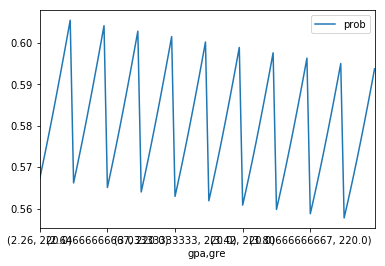

In [91]:
#Assumes that if Odds = (p / 1- p) then p = (odds / 1 + odds)
grp_df['prob'] = combos_new['Odds_Ratio'].apply(lambda x: x / (1 + x))
strat_cols = ['gre', 'gpa', 'prob']
grp_df = grp_df[strat_cols]
strat_df = grp_df.groupby(['gpa', 'gre']).mean()
strat_df.plot()

